# XGB test

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

from math import log, floor

import numpy as np
import matplotlib.pyplot as plt

# from tqdm import tqdm

# import shap


from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import KFold

# from plots2.fns import (
#     # standard_layout,
#     # corner_annotations_colwise,
#     # corner_annotations_rowwise,
#     # get_text_annotation,
#     get_corner_annotations,
#     get_corner_annotations_custom_labels,
#     # get_corner_annotations_explicit
# )

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import (
    load_train_test_data,
    get_best_model,
)
# from poly2.config import Config, ConfigMixture, get_asymptote_config

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
X_cv, y_cv, X_test, y_test = load_train_test_data('all')

## Squared error

In [4]:
%%time
xgb = get_best_model('all')

{'max_depth': 10, 'n_estimators': 1740, 'learning_rate': 0.0199085136730978, 'subsample': 0.5468065466488763, 'colsample_bytree': 0.8879850476692774, 'tree_method': 'hist'}
Wall time: 0 ns


In [5]:
%%time
xgb.fit(X_cv, y_cv)

y_p = xgb.predict(X_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Wall time: 56.3 s


## Plot

In [6]:
mean_squared_error(y_p, y_test[:, 0], squared=False)

0.10623304379219752

In [7]:
pdf = pd.DataFrame(dict(
    Model=y_p,
    Data=y_test[:, 0],
))

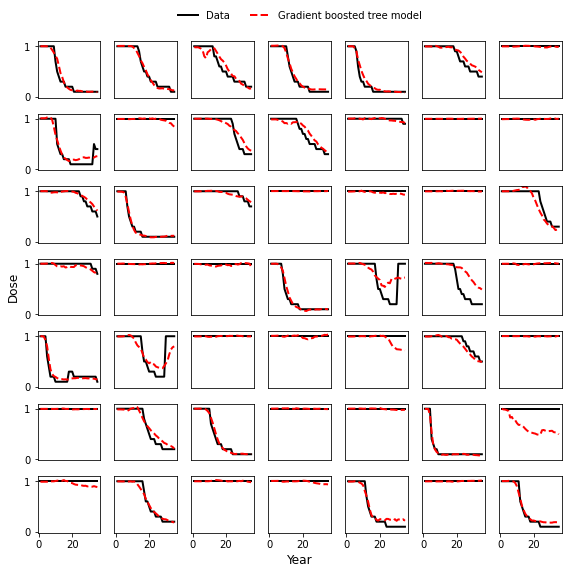

In [17]:
plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title

rows = 7
cols = 7

f, ax = plt.subplots(rows, cols, figsize=(8,8))

np.random.seed(2)
inds = np.random.choice(np.arange(49), replace=False, size=49)

for ii in range(rows*cols):
    d_ind = inds[ii]
    data = pdf.iloc[35*d_ind:35*(d_ind+1)].assign(year = np.arange(1,36))
    
    rr = floor(ii/rows)
    cc = ii%cols

    ax[rr][cc].plot(data.year, data.Data, c='k', lw=2, label='Data')
    ax[rr][cc].plot(data.year, data.Model, c='r', ls='--', lw=2, label='Gradient boosted tree model')
    
    ax[rr][cc].set_ylim([-0.02, 1.1])
    
    if rr<rows-1:
        ax[rr][cc].set_xticks([])
    
    if cc>0:
        ax[rr][cc].set_yticks([])
    
    if rr==3 and cc==0:
        ax[rr][cc].set_ylabel('Dose')

    if cc==3 and rr==rows-1:
        ax[rr][cc].set_xlabel('Year')
        
        

plt.tight_layout(rect=[0,0,1,0.95])

ax[0][0].legend(
    loc='lower left',
    bbox_to_anchor=(2.1, 1.2),
    ncol=2,
    framealpha=0,
)

# Save

In [18]:
f.savefig('../figures/paper/app2_fig1.jpg', dpi=1200, bbox_inches="tight")